In [ ]:
import wellmap
import pandas as pd
import os
import string
import seaborn as sns
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

New for multiple images in CP file

In [ ]:
part_to_folder = r"C:\Users\Modern\Documents\Biorad\CellProfiler\Results\2024-07-26 RZ test plate"

files = [f for f in listdir(part_to_folder) if isfile(join(part_to_folder, f))]

# image_list_path = os.path.join(part_to_folder, "ExpImage.csv")
# data_path  = os.path.join(part_to_folder, "ExpWells_plate.csv")

# data_raw_df = pd.read_csv(data_path) 
# image_list_df = pd.read_csv(image_list_path) 

# print(files)


deg_90_filename = r'2024-07-26 RZ conc test 90 deg plate scaled 3 (Multichannel).csv'
deg_90_df = pd.read_csv(os.path.join(part_to_folder, deg_90_filename))

deg_0_filename = r'2024-07-26 RZ conc test plate 3 (Multichannel).csv'
deg_0_df = pd.read_csv(os.path.join(part_to_folder, deg_0_filename))



In [ ]:
deg_90_wellmap_filename = r'2024-07-26 RZ conc test 90 deg plate scaled 3 (Multichannel).toml'
deg_0_wellmap_filename = r'2024-07-26 RZ conc test plate 3 (Multichannel).toml'


deg_90_wellmap_df = wellmap.load(os.path.join(part_to_folder, deg_90_wellmap_filename)) 
deg_0_wellmap__wellmap_df = wellmap.load(os.path.join(part_to_folder, deg_0_wellmap_filename)) 

wellmap.show(os.path.join(part_to_folder, deg_90_wellmap_filename));

image_list = [[1,'2024-07-26 RZ conc test 90 deg plate scaled 3 (Multichannel).tif'],[2,'2024-07-26 RZ conc test plate 3 (Multichannel).tif']]
image_list_df = pd.DataFrame(image_list, columns=['ImageNumber', 'FileName_RGB'])


Generating labels for wells

In [ ]:
# row_column_df = pd.DataFrame(columns=['row','col'])

row =  list(string.ascii_uppercase[0:8])
column = list(range(1,13))
plate = image_list_df['FileName_RGB'].to_list()

row_column_list = []


for c in column:
    for r in row:
        array_i = [r,c]
        row_column_list.append(array_i)

row_column_df = pd.DataFrame(row_column_list, columns = ['row', 'col']) 

print(row_column_df)

Add images names to data (thank you CellProfiler for convenience)

In [30]:
# data_90_deg =  pd.merge(deg_90_df, row_column_df) #Data with image names (FileName_RGB)
data_90_deg = pd.concat([deg_90_df, row_column_df], axis=1, join='inner') #Data with image names (FileName_RGB) and cell indexes (row,col)
data_0_deg = pd.concat([deg_0_df, row_column_df], axis=1, join='inner')
# data_indexed['col']=data_indexed['col'].astype(str) #Otherwise everything will break

# data_plate = pd.merge(data_indexed, wellmaps_df, on=['FileName_RGB','row','col']) #Data with image names (FileName_RGB), cell indexes and wellmap
# data_plate[["conc_uM"]] = data_plate[["conc_uM"]].apply(pd.to_numeric)

print(data_90_deg.columns)

Index(['ImageNumber', 'ObjectNumber',
       'Intensity_IntegratedIntensity_OrigGreen',
       'Intensity_IntegratedIntensity_OrigRed',
       'Intensity_MeanIntensity_OrigGreen', 'Intensity_MeanIntensity_OrigRed',
       'Intensity_StdIntensity_OrigGreen', 'Intensity_StdIntensity_OrigRed',
       'row', 'col'],
      dtype='object')


<Axes: xlabel='col', ylabel='row'>

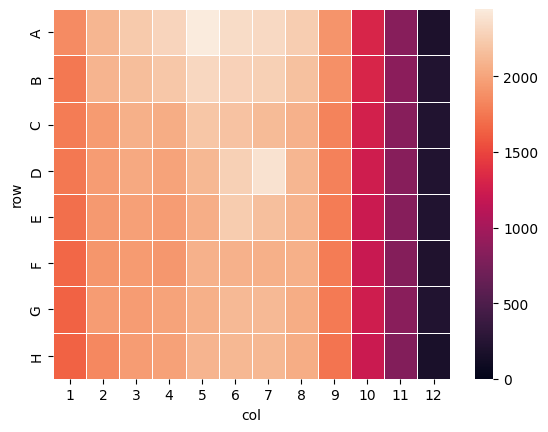

In [37]:
# sample_plate = data_90_deg[(data_90_deg['RZ_incubation'] == '5H')].copy().reset_index(drop=True)

heatmap_df = data_90_deg.pivot(index="row", columns="col", values="Intensity_IntegratedIntensity_OrigRed")

sns.heatmap(heatmap_df, linewidth=.5, vmin=0, vmax=None)

# print(sample_plate)

In [ ]:
sample_plate['Mean_dif'] = reference_plate['Mean_dif']

sample_plate['Mean_corr'] = sample_plate['Intensity_MeanIntensity_OrigGreen']*sample_plate['Mean_dif']

print(sample_plate['Mean_corr'])

heatmap_df = sample_plate.pivot(index="row", columns="col", values="Mean_corr")

# sns.heatmap(heatmap_df, linewidth=.5, vmin=0, vmax=None)

p = "2024-07-19 RD CK-122 5H (Multichannel).tif"

mean_sample = sample_plate[(sample_plate['FileName_RGB'] == p)].loc[:,'Intensity_MeanIntensity_OrigGreen'].mean()

sample_plate['Mean_dif_to_mean'] = sample_plate['Intensity_MeanIntensity_OrigGreen']/mean_sample

sample_plate['Mean_dif_to_mean'] = sample_plate['Intensity_MeanIntensity_OrigGreen']/mean_sample

sample_plate['Mean_corr'] = sample_plate['Intensity_MeanIntensity_OrigGreen']/reference_plate['Mean_dif'] 

sample_plate['Mean_corr_dif'] = sample_plate['Mean_corr']/mean_sample


heatmap_df = sample_plate.pivot(index="row", columns="col", values="Mean_corr")

sns.heatmap(heatmap_df, linewidth=.5 )


plt.show()


In [ ]:
# row_drop_list = ['A','H']

# cleared_data = sample_plate[~sample_plate['row'].isin(row_drop_list)]

cleared_data = sample_plate[sample_plate['blank']=='No']

well_drop_list = ['']

ax = sns.boxplot(data=cleared_data, x="conc_uM", y="Intensity_MeanIntensity_OrigGreen", hue = 'substance', palette=['r'])

ay = sns.boxplot(data=cleared_data, x="conc_uM", y="Mean_corr", hue = 'substance')

In [ ]:

ax = sns.relplot(data=cleared_data, x="conc_uM", y="Intensity_MeanIntensity_OrigGreen", hue = 'substance', palette=['r'],  kind="line")

ay = sns.relplot(data=cleared_data, x="conc_uM", y="Mean_corr", hue = 'substance',  kind="line")

ax.set(xscale="symlog")
ay.set(xscale="symlog")

ax.set(xlim=(0, 200))
ay.set(xlim=(0, 200))

In [ ]:
ax = sns.swarmplot(data=cleared_data, x="conc_uM", y="Intensity_MeanIntensity_OrigGreen", hue = 'substance', palette=['r'])

ay = sns.swarmplot(data=cleared_data, x="conc_uM", y="Mean_corr", hue = 'substance')


Blank and control calculation for each plate

In [ ]:
blank_array = []

p = "2024-07-19 RD CK-122 5H (Multichannel).tif"



blank_p = sample_plate[(sample_plate['blank'] == 'Yes') & (sample_plate['FileName_RGB'] == p)].loc[:,'Mean_corr'].mean()
blank_std_p = sample_plate[(sample_plate['blank'] == 'Yes') & (sample_plate['FileName_RGB'] == p)].loc[:,'Mean_corr'].std()

bc_array_i = [blank_p, blank_std_p ,p]

blank_array.append(bc_array_i)

blank_df = pd.DataFrame(blank_array, columns = ['blank_mean','blank_std','FileName_RGB']) 

data_plate_with_blank = pd.merge(sample_plate, blank_df, on=['FileName_RGB'])

print(blank_df)


In [ ]:
data_plate_with_blank['Green_blanked'] = data_plate_with_blank['Mean_corr'] - data_plate_with_blank['blank_mean']


data_plate_wo_blank = data_plate_with_blank[data_plate_with_blank.blank == 'No'].copy() #dataframe without blank

control_array = []

control_p = data_plate_wo_blank[(data_plate_wo_blank['control'] == 'Yes') 
                                & (data_plate_wo_blank['blank'] == 'No') & 
                                (data_plate_wo_blank['FileName_RGB'] == p)].loc[:,'Green_blanked'].mean()

control_std_p = data_plate_wo_blank[(data_plate_wo_blank['control'] == 'Yes') 
                                    & (data_plate_wo_blank['blank'] == 'No') & 
                                    (data_plate_wo_blank['FileName_RGB'] == p)].loc[:,'Green_blanked'].std()

bc_array_i = [control_p,control_std_p,p]

control_array.append(bc_array_i)

control_df = pd.DataFrame(control_array, columns = ['control_mean', 'control_std','FileName_RGB']) 

print(control_df)

data_plate_with_control = pd.merge(data_plate_wo_blank, control_df, on=['FileName_RGB'])

data_plate_with_control['Green_relative'] = data_plate_with_control['Green_blanked']/data_plate_with_control['control_mean']*100


print(data_plate_with_control[(data_plate_with_control['control'] == 'Yes') 
                                & (data_plate_with_control['blank'] == 'No') & 
                                (data_plate_with_control['FileName_RGB'] == p)].loc[:,'Green_relative'])

Plotting


In [ ]:

# row_drop_list = ['A','H']

row_drop_list = []

cleared_data = data_plate_with_control[~data_plate_with_control['row'].isin(row_drop_list)]

ax = sns.relplot(data=cleared_data, x="conc_uM", y="Green_relative", kind="line", hue = 'substance')

# ax.set(xlabel=None, ylabel='Viable cell, % of control')

ax.set(xlabel='Concentration, μM', ylabel='Cell viability relative to control, %')
ax.set(xscale="symlog")

ax.set(xlim=(0, 200),ylim = (0,120))

plt.show()



In [ ]:
sns.swarmplot(data=data_plate_with_control, x="conc_uM", y="Green_relative", hue = 'substance')